<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Linear-Network-for-CIFAR10-Dataset" data-toc-modified-id="Linear-Network-for-CIFAR10-Dataset-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Linear Network for CIFAR10 Dataset</a></span><ul class="toc-item"><li><span><a href="#Libraries" data-toc-modified-id="Libraries-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Libraries</a></span></li><li><span><a href="#Downloading-the-Dataset-and-Visualization" data-toc-modified-id="Downloading-the-Dataset-and-Visualization-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Downloading the Dataset and Visualization</a></span></li><li><span><a href="#Defining-Network-Class,-Train-function-and-Evaluate-function" data-toc-modified-id="Defining-Network-Class,-Train-function-and-Evaluate-function-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Defining Network Class, Train function and Evaluate function</a></span></li><li><span><a href="#The-Main-Modules-for-the-Experiments" data-toc-modified-id="The-Main-Modules-for-the-Experiments-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>The Main Modules for the Experiments</a></span><ul class="toc-item"><li><span><a href="#1st-Experiment:-SGD-optimizer-and-No-Regularizer" data-toc-modified-id="1st-Experiment:-SGD-optimizer-and-No-Regularizer-1.4.1"><span class="toc-item-num">1.4.1&nbsp;&nbsp;</span>1st Experiment: SGD optimizer and No Regularizer</a></span></li><li><span><a href="#2nd-Experiment:-Nesterov-optimizer-and-No-Regularizer" data-toc-modified-id="2nd-Experiment:-Nesterov-optimizer-and-No-Regularizer-1.4.2"><span class="toc-item-num">1.4.2&nbsp;&nbsp;</span>2nd Experiment: Nesterov optimizer and No Regularizer</a></span></li><li><span><a href="#3rd-Experiment:-Nesterov-optimizer-and-L2-Regularizer" data-toc-modified-id="3rd-Experiment:-Nesterov-optimizer-and-L2-Regularizer-1.4.3"><span class="toc-item-num">1.4.3&nbsp;&nbsp;</span>3rd Experiment: Nesterov optimizer and L2 Regularizer</a></span></li><li><span><a href="#4th-Experiment:-Nesterov-optimizer-and-L1-Regularizer" data-toc-modified-id="4th-Experiment:-Nesterov-optimizer-and-L1-Regularizer-1.4.4"><span class="toc-item-num">1.4.4&nbsp;&nbsp;</span>4th Experiment: Nesterov optimizer and L1 Regularizer</a></span></li></ul></li><li><span><a href="#Visualization-of-Results" data-toc-modified-id="Visualization-of-Results-1.5"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>Visualization of Results</a></span><ul class="toc-item"><li><span><a href="#Comparing-the-Accuracies-of-4-Experiments" data-toc-modified-id="Comparing-the-Accuracies-of-4-Experiments-1.5.1"><span class="toc-item-num">1.5.1&nbsp;&nbsp;</span>Comparing the Accuracies of 4 Experiments</a></span></li><li><span><a href="#Comparing-the-Losses-of-4-Experiments-(on-the-Validation-Data)" data-toc-modified-id="Comparing-the-Losses-of-4-Experiments-(on-the-Validation-Data)-1.5.2"><span class="toc-item-num">1.5.2&nbsp;&nbsp;</span>Comparing the Losses of 4 Experiments (on the Validation Data)</a></span></li><li><span><a href="#Comparing-the-Losses-of-4-Experiments-(on-the-Training-Data)" data-toc-modified-id="Comparing-the-Losses-of-4-Experiments-(on-the-Training-Data)-1.5.3"><span class="toc-item-num">1.5.3&nbsp;&nbsp;</span>Comparing the Losses of 4 Experiments (on the Training Data)</a></span></li></ul></li></ul></li></ul></div>

# Linear Network for CIFAR10 Dataset

Elif Cansu YILDIZ


## Libraries

In [49]:
import numpy as np
import matplotlib.pyplot as plt
import torch as th
from torchvision.transforms import ToTensor
from torchvision.datasets import CIFAR10
from torch.utils.data import random_split
from torch.utils.data.dataloader import DataLoader
from torchvision.utils import make_grid
from torchsummary import summary

## Downloading the Dataset and Visualization

In [2]:
dataset = CIFAR10(root='data/', download=True, transform=ToTensor())
test_dataset = CIFAR10(root='data/', train=False, transform=ToTensor())


Extracting data/cifar-10-python.tar.gz to data/


In [3]:
th.manual_seed(43)

# We use about 20% of the dataset for validation.
val_size = 10000
train_size = len(dataset) - val_size

train_ds, val_ds = random_split(dataset, [train_size, val_size])
print("Data sizes after random splitting -> ", "\nTraining data size = ",len(train_ds), "\nValidation data size = ", len(val_ds))

batch_size=128

train_loader = DataLoader(train_ds, batch_size, shuffle=True, num_workers=4, pin_memory=True)
val_loader = DataLoader(val_ds, batch_size*2, num_workers=4, pin_memory=True)
test_loader = DataLoader(test_dataset, batch_size*2, num_workers=4, pin_memory=True)

Data sizes after random splitting ->  
Training data size =  40000 
Validation data size =  10000


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:477: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:477: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


images.shape: torch.Size([128, 3, 32, 32])
images.shape: torch.Size([128, 3, 32, 32])
images.shape: torch.Size([128, 3, 32, 32])


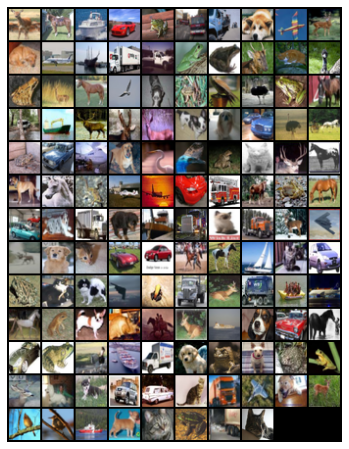

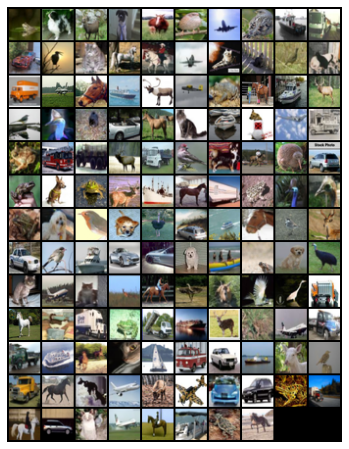

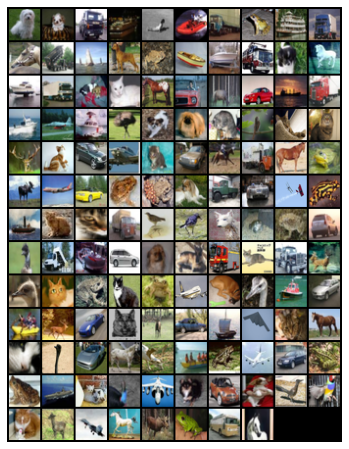

In [4]:
#Visualization of dataset in batches
for index, (images, labels) in enumerate(train_loader):
    print('images.shape:', images.shape)
    plt.figure(figsize=(20,8))
    plt.axis('off')
    plt.imshow(make_grid(images, nrow=10).permute((1, 2, 0)))
    if index == 2:  #number of batches to visualize
      break

## Defining Network Class, Train function and Evaluate function

In [5]:
class Network(th.nn.Module):
    def __init__(self, num_inputs, num_classes, num_neurons=(512,512), activation=[th.nn.ReLU(), th.nn.ReLU()]):
        super(Network, self).__init__()
        self.activation = activation
        #self.softmax = th.nn.Softmax(dim=1)
        
        self.layers = th.nn.ModuleList()
        self.layers.append(th.nn.Linear(num_inputs, num_neurons[0], True))
        self.layers.append(activation[0])
        for i in range(len(num_neurons)-1):
            self.layers.append(th.nn.Linear(num_neurons[i], num_neurons[i+1], True))
            self.layers.append(activation[i+1])
        self.layers.append(th.nn.Linear(num_neurons[-1], num_classes, True))
        #self.layers.append(self.softmax)   #Because CrossEntropyLoss function takes care of both Softmax and NLL loss 
        
    def forward(self, x):
        for layer in self.layers:
            x = layer(x)
        return x

"""
reg_type   regularization type: l1 or l2
"""
def train(model, dataloader, optimizer, lossFunc, reg_type="l2", reg_multiplier=0):
    
    loss_hist = np.array([])
    for index, (trainingImages,trainingLabels) in enumerate(dataloader):
        optimizer.zero_grad()

        prediction = model(trainingImages.reshape(-1, 32*32*3))

        #weights are obtained since biases are not used for regularization
        weights = []
        for name, param in model.named_parameters():
            if param.requires_grad and "weight" in name:
                weights.append(param.flatten())
        weights = th.cat(weights, dim=0)

        if reg_type=="l2":  
            loss = lossFunc(prediction, trainingLabels.squeeze()) + reg_multiplier * len(trainingImages) * th.linalg.norm(weights)**2
        else:
            loss = lossFunc(prediction, trainingLabels.squeeze()) + reg_multiplier * len(trainingImages) * th.linalg.norm(weights)

        loss_hist = np.append(loss_hist, loss.item())
        loss.backward()
        optimizer.step()
        with th.no_grad():
            if index % 100 == 0:
                print('Train {}/{} Loss {:.6f}'.format(index, len(dataloader), loss.item()))
    return loss_hist

def evaluate(model, val_dataloader, lossFunction):

    total_loss = 0
    total_accuracy = 0
    for (val_images, val_labels) in val_dataloader:
        prediction = model(val_images.reshape(-1, 32*32*3))
        loss = lossFunction(prediction, val_labels.squeeze()).item() / len(val_images)
        total_loss += loss

        pred_label = th.argmax(prediction, dim=1)
        #print("----------", pred_label[0:10], labels.squeeze()[0:10], pred_label[0:10] == labels.squeeze()[0:10])
        accuracy = ((pred_label == val_labels).sum().item()) / len(val_images)
        #accuracy = th.sum(pred_label == labels.squeeze()) / len(labels)
        total_accuracy += accuracy

    avg_loss = total_loss / len(val_dataloader)
    avg_accuracy = total_accuracy / len(val_dataloader)
    return avg_loss, avg_accuracy

**Note:** 
In theory, Softmax activation function and Negative Log Likelihood loss (NLL) are used together.  
The formula of Softmax:
$$ \sigma (z)_j = \frac{exp(z_j}{\sum_{k=1}^M exp(z_k)} $$

The formula of NLL:
$$ - \sum_{j=1}^M y_j log \hat y_j $$ where y is actual value, $\hat y$ is predicted value

CrossEntropy Loss:
If a discrete random variable X has the probability mass function f(x), then the entropy of 
X is
$$H(X) = \sum_x f(x) log \frac{1}{f(x)} = - \sum_x f(x) log(f(x))$$

In the Pytorch implementation:

NLL function does not apply log of predicted y. So, if user decides to use Softmax and NLL function instead of just one CrossEntropy Loss, donot forget to use logSoftmax function instead of Softmax function. Because formula requires log of predicted y. Crossentropy function handles it properly.

Nice explanation of these methods:
http://www.awebb.info/probability/2017/05/18/cross-entropy-and-log-likelihood.html

In [ ]:
ss = th.nn.LogSoftmax()
nnn = th.nn.NLLLoss()
print(nnn(ss(out), label))

cl = th.nn.CrossEntropyLoss()
print(cl(out, label))

## The Main Modules for the Experiments

### 1st Experiment: SGD optimizer and No Regularizer

In [9]:
if __name__ == "__main__":
    
    model = Network(32*32*3, 10)
    optimizer = th.optim.SGD(model.parameters(), lr=0.01)
 
    batch_size=64

    train_loader = DataLoader(train_ds, batch_size, shuffle=True, num_workers=4, pin_memory=True)
    val_loader = DataLoader(val_ds, batch_size*2, num_workers=4, pin_memory=True)
    
    loss_function = th.nn.CrossEntropyLoss()

    total_loss_1 = 0
    training_loss_hist_1 = np.array([])
    valid_loss_hist_1 = np.array([])
    valid_acc_hist_1 = np.array([])
    for epoch in range(25):
        print("Epoch ", epoch)
        #training
        loss_hist_per_epoch = train(model, train_loader, optimizer, loss_function)

        #evaluation
        valid_loss, valid_accuracy = evaluate(model, val_loader, loss_function)

        #loss and accuracy histories are kept
        training_loss_hist_1 = np.hstack((training_loss_hist_1, loss_hist_per_epoch))
        valid_loss_hist_1 = np.hstack((valid_loss_hist_1, valid_loss))   
        valid_acc_hist_1 = np.hstack((valid_acc_hist_1, valid_accuracy))
        print("validation loss = ", valid_loss, " accuracy = ", valid_accuracy)
        total_loss_1 += valid_loss

    print("Total loss = ", total_loss_1)



Epoch  0


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:477: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


Train 0/625 Loss 2.297859
Train 100/625 Loss 2.277816
Train 200/625 Loss 2.205801
Train 300/625 Loss 2.141692
Train 400/625 Loss 1.968177
Train 500/625 Loss 2.076871
Train 600/625 Loss 1.897734
validation loss =  0.01679071814670593  accuracy =  0.2855023734177215
Epoch  1
Train 0/625 Loss 2.105329
Train 100/625 Loss 1.872321
Train 200/625 Loss 2.012610
Train 300/625 Loss 1.941654
Train 400/625 Loss 1.933218
Train 500/625 Loss 1.999593
Train 600/625 Loss 1.758942
validation loss =  0.01577857694341035  accuracy =  0.33010284810126583
Epoch  2
Train 0/625 Loss 1.836136
Train 100/625 Loss 1.756079
Train 200/625 Loss 1.906468
Train 300/625 Loss 1.775151
Train 400/625 Loss 1.951501
Train 500/625 Loss 1.723932
Train 600/625 Loss 1.785453
validation loss =  0.015309824961933154  accuracy =  0.3480023734177215
Epoch  3
Train 0/625 Loss 1.863097
Train 100/625 Loss 1.875547
Train 200/625 Loss 1.678227
Train 300/625 Loss 1.902677
Train 400/625 Loss 1.775271
Train 500/625 Loss 1.638951
Train 600/

In [13]:
model = Network(32*32*3, 10)
print(model)

Network(
  (layers): ModuleList(
    (0): Linear(in_features=3072, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=512, bias=True)
    (3): Sigmoid()
    (4): Linear(in_features=512, out_features=10, bias=True)
  )
)


### 2nd Experiment: Nesterov optimizer and No Regularizer

In [10]:
if __name__ == "__main__":
    
    model = Network(32*32*3, 10)
    optimizer = th.optim.SGD(model.parameters(), lr=0.01, momentum=0.9, nesterov=True)
 
    batch_size=128

    train_loader = DataLoader(train_ds, batch_size, shuffle=True, num_workers=4, pin_memory=True)
    val_loader = DataLoader(val_ds, batch_size*2, num_workers=4, pin_memory=True)
    
    loss_function = th.nn.CrossEntropyLoss()

    total_loss_2 = 0
    training_loss_hist_2 = np.array([])
    valid_loss_hist_2 = np.array([])
    valid_acc_hist_2 = np.array([])
    for epoch in range(25):
        print("Epoch ", epoch)
        #training
        loss_hist_per_epoch = train(model, train_loader, optimizer, loss_function)

        #evaluation
        valid_loss, valid_accuracy = evaluate(model, val_loader, loss_function)

        #loss and accuracy histories are kept
        training_loss_hist_2 = np.hstack((training_loss_hist_2, loss_hist_per_epoch))
        valid_loss_hist_2 = np.hstack((valid_loss_hist_2, valid_loss))   
        valid_acc_hist_2 = np.hstack((valid_acc_hist_2, valid_accuracy))
        print("validation loss = ", valid_loss, " accuracy = ", valid_accuracy)
        total_loss_2 += valid_loss

    print("Total loss = ", total_loss_2)

Epoch  0


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:477: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


Train 0/313 Loss 2.303574
Train 100/313 Loss 2.026408
Train 200/313 Loss 1.799234
Train 300/313 Loss 1.715057
validation loss =  0.008795479417312891  accuracy =  0.3822265625
Epoch  1
Train 0/313 Loss 1.713887
Train 100/313 Loss 1.799819
Train 200/313 Loss 1.682130
Train 300/313 Loss 1.571037
validation loss =  0.00800536796450615  accuracy =  0.41494140625
Epoch  2
Train 0/313 Loss 1.642905
Train 100/313 Loss 1.606429
Train 200/313 Loss 1.465633
Train 300/313 Loss 1.699139
validation loss =  0.008406180317979305  accuracy =  0.40283203125
Epoch  3
Train 0/313 Loss 1.478457
Train 100/313 Loss 1.519145
Train 200/313 Loss 1.343248
Train 300/313 Loss 1.473969
validation loss =  0.00773240476846695  accuracy =  0.43408203125
Epoch  4
Train 0/313 Loss 1.594408
Train 100/313 Loss 1.610306
Train 200/313 Loss 1.522949
Train 300/313 Loss 1.517458
validation loss =  0.007440398342441768  accuracy =  0.4615234375
Epoch  5
Train 0/313 Loss 1.379601
Train 100/313 Loss 1.411262
Train 200/313 Loss 1

### 3rd Experiment: Nesterov optimizer and L2 Regularizer

In [35]:
if __name__ == "__main__":
    
    model = Network(32*32*3, 10)
    optimizer = th.optim.SGD(model.parameters(), lr=0.01, momentum=0.9, nesterov=True)
 
    batch_size=128

    train_loader = DataLoader(train_ds, batch_size, shuffle=True, num_workers=4, pin_memory=True)
    val_loader = DataLoader(val_ds, batch_size*2, num_workers=4, pin_memory=True)
    
    loss_function = th.nn.CrossEntropyLoss()

    total_loss_3 = 0
    training_loss_hist_3 = np.array([])
    valid_loss_hist_3 = np.array([])
    valid_acc_hist_3 = np.array([])
    for epoch in range(25):
        print("Epoch ", epoch)
        #training
        loss_hist_per_epoch = train(model, train_loader, optimizer, loss_function, reg_type="l2", reg_multiplier=0.00001)

        #evaluation
        valid_loss, valid_accuracy = evaluate(model, val_loader, loss_function)

        #loss and accuracy histories are kept
        training_loss_hist_3 = np.hstack((training_loss_hist_3, loss_hist_per_epoch))
        valid_loss_hist_3 = np.hstack((valid_loss_hist_3, valid_loss))   
        valid_acc_hist_3 = np.hstack((valid_acc_hist_3, valid_accuracy))
        print("validation loss = ", valid_loss, " accuracy = ", valid_accuracy)
        total_loss_3 += valid_loss

    print("Total loss = ", total_loss_3)

Epoch  0


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:477: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


Train 0/313 Loss 2.744719
Train 100/313 Loss 2.324629
Train 200/313 Loss 2.195494
Train 300/313 Loss 2.258836
validation loss =  0.008934619335923344  accuracy =  0.37080078125
Epoch  1
Train 0/313 Loss 2.198908
Train 100/313 Loss 2.049386
Train 200/313 Loss 2.059400
Train 300/313 Loss 2.014074
validation loss =  0.00841451877495274  accuracy =  0.394921875
Epoch  2
Train 0/313 Loss 1.882399
Train 100/313 Loss 1.908429
Train 200/313 Loss 1.866894
Train 300/313 Loss 1.874663
validation loss =  0.007773148920387029  accuracy =  0.42998046875
Epoch  3
Train 0/313 Loss 1.963734
Train 100/313 Loss 1.826162
Train 200/313 Loss 1.848432
Train 300/313 Loss 1.855021
validation loss =  0.00770292580127716  accuracy =  0.4298828125
Epoch  4
Train 0/313 Loss 1.792482
Train 100/313 Loss 1.740320
Train 200/313 Loss 1.812132
Train 300/313 Loss 1.769268
validation loss =  0.007909165567252786  accuracy =  0.43623046875
Epoch  5
Train 0/313 Loss 1.858150
Train 100/313 Loss 1.802955
Train 200/313 Loss 1.

### 4th Experiment: Nesterov optimizer and L1 Regularizer

In [36]:
if __name__ == "__main__":
    
    model = Network(32*32*3, 10)
    optimizer = th.optim.SGD(model.parameters(), lr=0.01, momentum=0.9, nesterov=True)
 
    batch_size=128

    train_loader = DataLoader(train_ds, batch_size, shuffle=True, num_workers=4, pin_memory=True)
    val_loader = DataLoader(val_ds, batch_size*2, num_workers=4, pin_memory=True)
    
    loss_function = th.nn.CrossEntropyLoss()

    total_loss_4 = 0
    training_loss_hist_4 = np.array([])
    valid_loss_hist_4 = np.array([])
    valid_acc_hist_4 = np.array([])
    for epoch in range(25):
        print("Epoch ", epoch)
        #training
        loss_hist_per_epoch = train(model, train_loader, optimizer, loss_function, reg_type="l1", reg_multiplier=0.00001)

        #evaluation
        valid_loss, valid_accuracy = evaluate(model, val_loader, loss_function)

        #loss and accuracy histories are kept
        training_loss_hist_4 = np.hstack((training_loss_hist_4, loss_hist_per_epoch))
        valid_loss_hist_4 = np.hstack((valid_loss_hist_4, valid_loss))   
        valid_acc_hist_4 = np.hstack((valid_acc_hist_4, valid_accuracy))
        print("validation loss = ", valid_loss, " accuracy = ", valid_accuracy)
        total_loss_4 += valid_loss

    print("Total loss = ", total_loss_4)

Epoch  0


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:477: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


Train 0/313 Loss 2.315374
Train 100/313 Loss 1.919538
Train 200/313 Loss 1.969562
Train 300/313 Loss 1.841224
validation loss =  0.009010995796415955  accuracy =  0.35126953125
Epoch  1
Train 0/313 Loss 1.743630
Train 100/313 Loss 1.762189
Train 200/313 Loss 1.673928
Train 300/313 Loss 1.827532
validation loss =  0.008124158042483032  accuracy =  0.40986328125
Epoch  2
Train 0/313 Loss 1.611826
Train 100/313 Loss 1.595234
Train 200/313 Loss 1.577750
Train 300/313 Loss 1.480558
validation loss =  0.00821592970751226  accuracy =  0.412890625
Epoch  3
Train 0/313 Loss 1.540921
Train 100/313 Loss 1.593898
Train 200/313 Loss 1.598225
Train 300/313 Loss 1.546682
validation loss =  0.007618852390442044  accuracy =  0.4408203125
Epoch  4
Train 0/313 Loss 1.665120
Train 100/313 Loss 1.610643
Train 200/313 Loss 1.382763
Train 300/313 Loss 1.334102
validation loss =  0.007575962005648762  accuracy =  0.46064453125
Epoch  5
Train 0/313 Loss 1.415747
Train 100/313 Loss 1.414326
Train 200/313 Loss 1

## Visualization of Results

### Comparing the Accuracies of 4 Experiments

Text(0.5, 1.0, 'Nesterov Optimizer, L1 Regularizer')

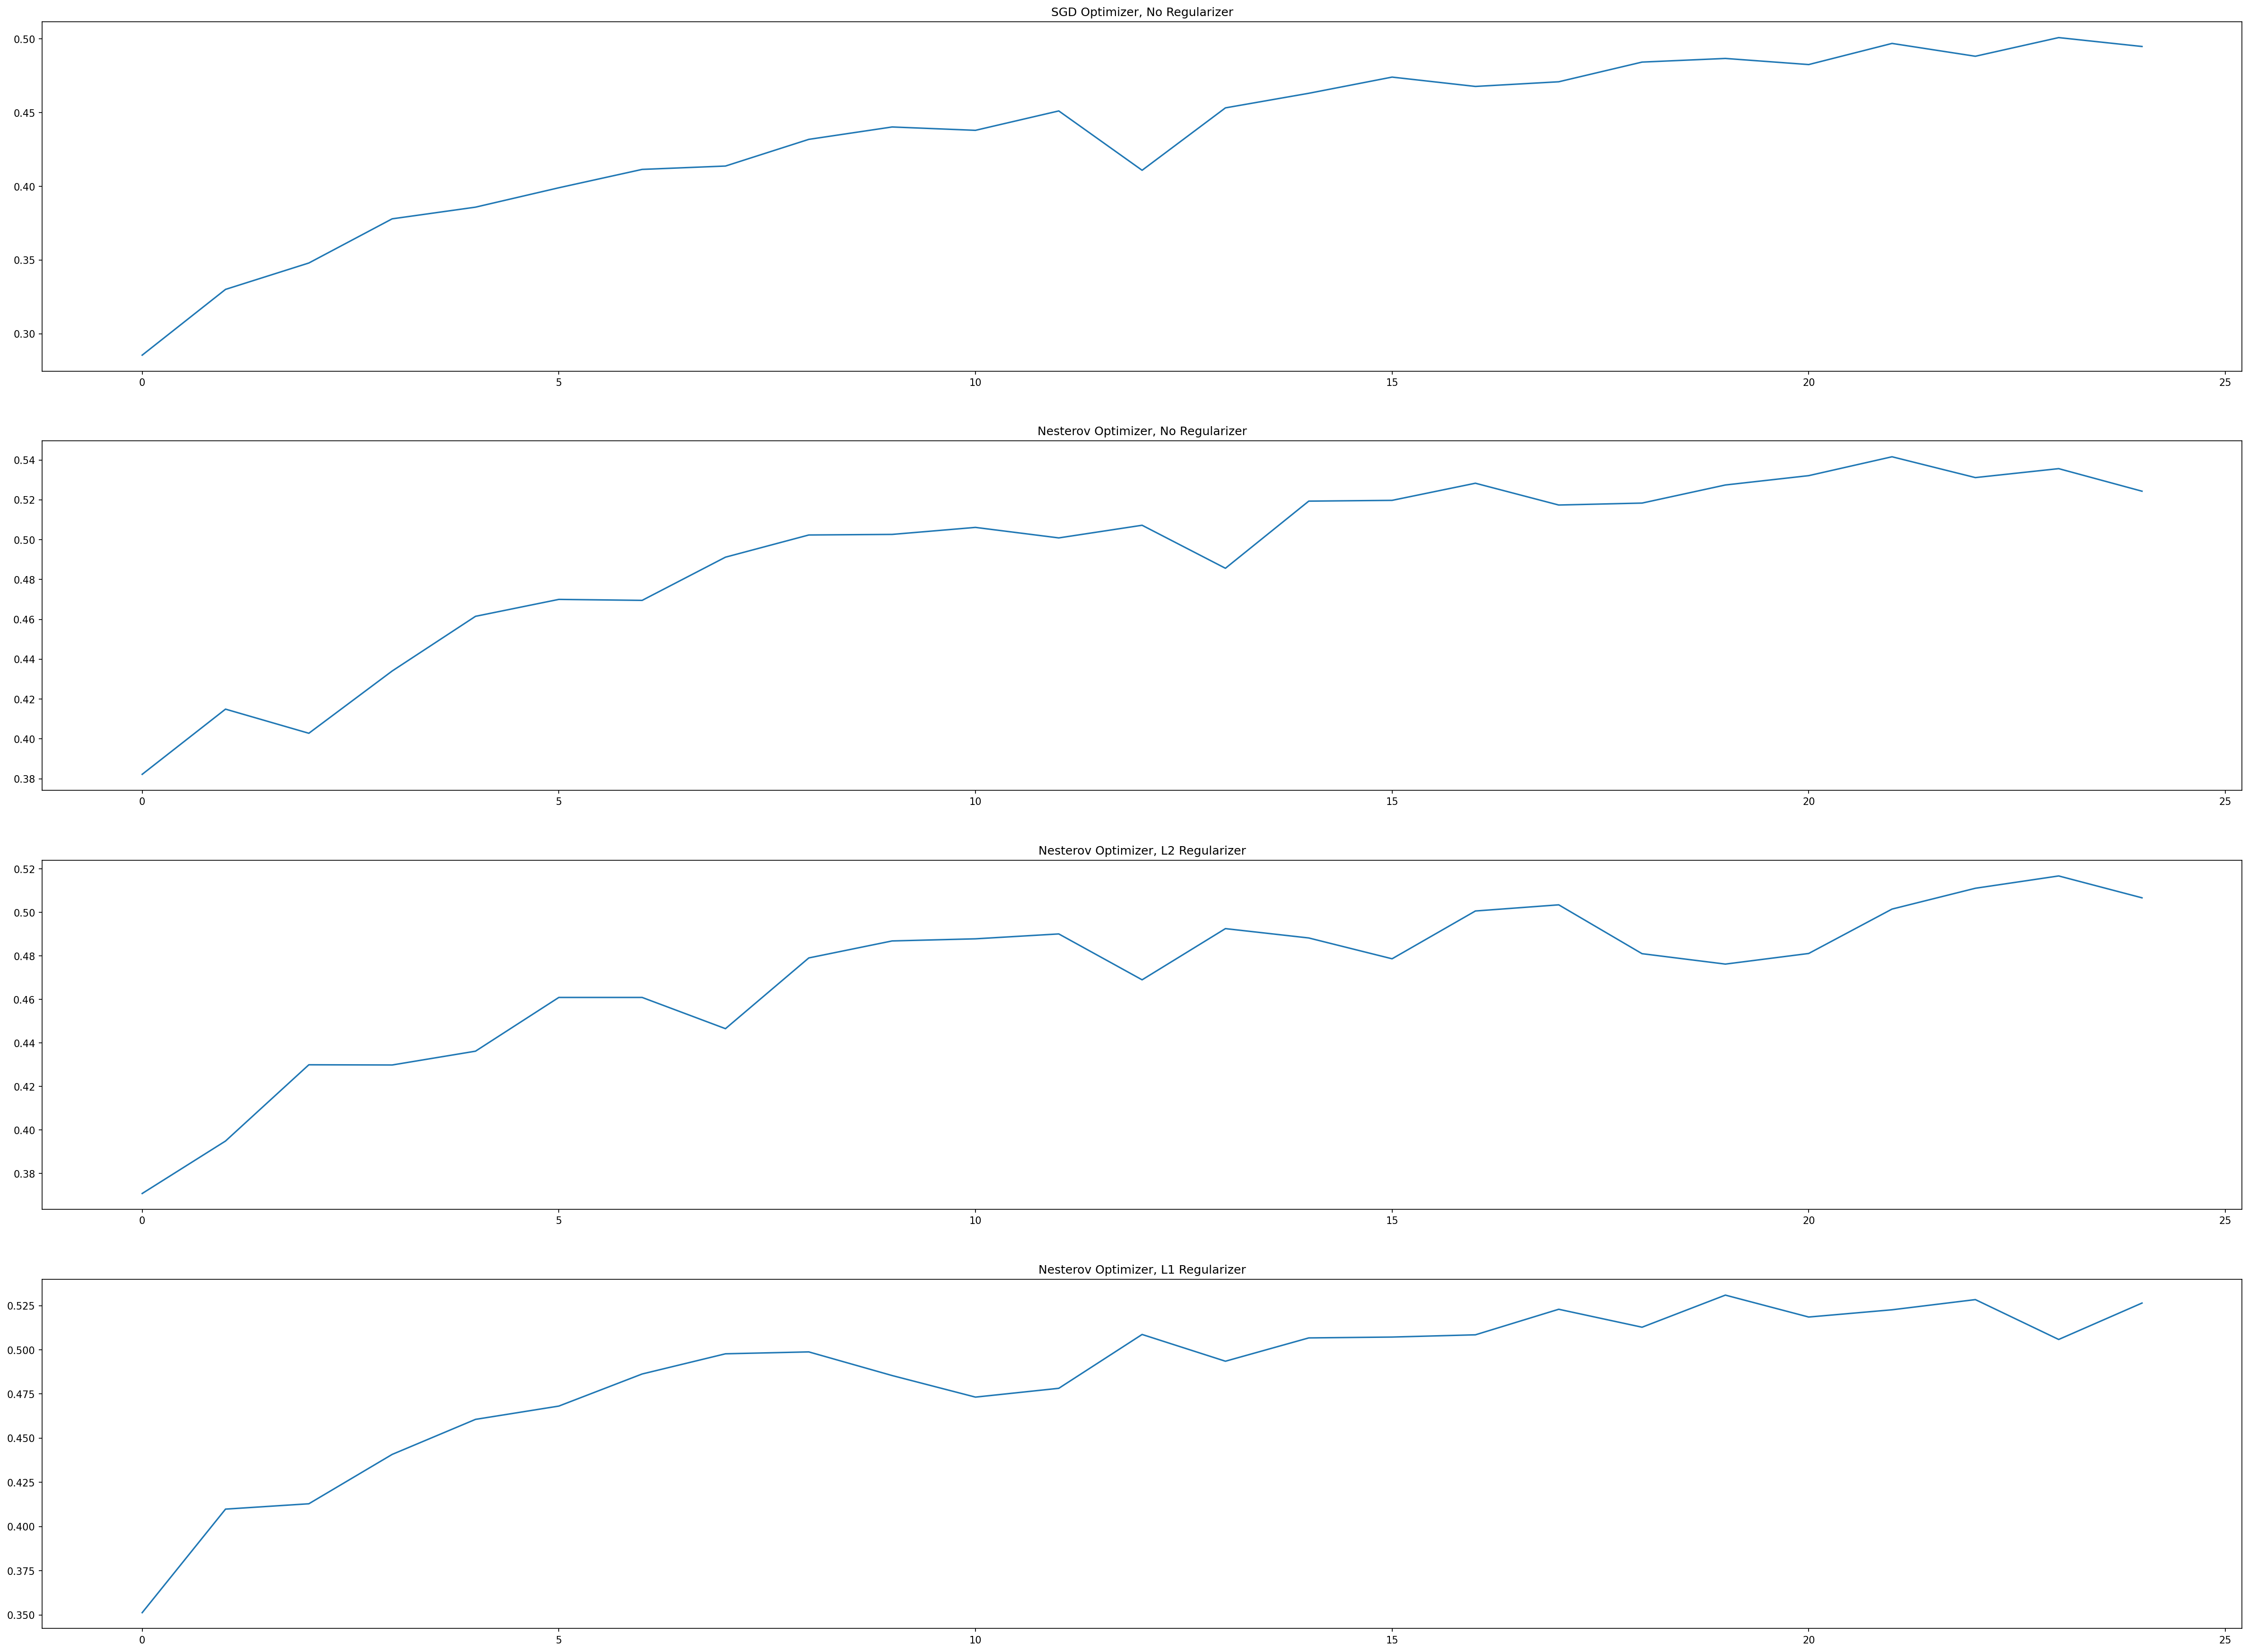

In [42]:
fig, axs = plt.subplots(4, figsize=(40,30), dpi=150, sharex=False, sharey=False)

epoch = 2   #which epoch loss data you want to visualize
num_of_batch = 313 #got the info from the prints

axs[0].plot(valid_acc_hist_1); axs[0].set_title('SGD Optimizer, No Regularizer')
axs[1].plot(valid_acc_hist_2); axs[1].set_title('Nesterov Optimizer, No Regularizer')
axs[2].plot(valid_acc_hist_3); axs[2].set_title('Nesterov Optimizer, L2 Regularizer')
axs[3].plot(valid_acc_hist_4); axs[3].set_title('Nesterov Optimizer, L1 Regularizer')

### Comparing the Losses of 4 Experiments (on the Validation Data)

Text(0.5, 1.0, 'Nesterov Optimizer, L1 Regularizer')

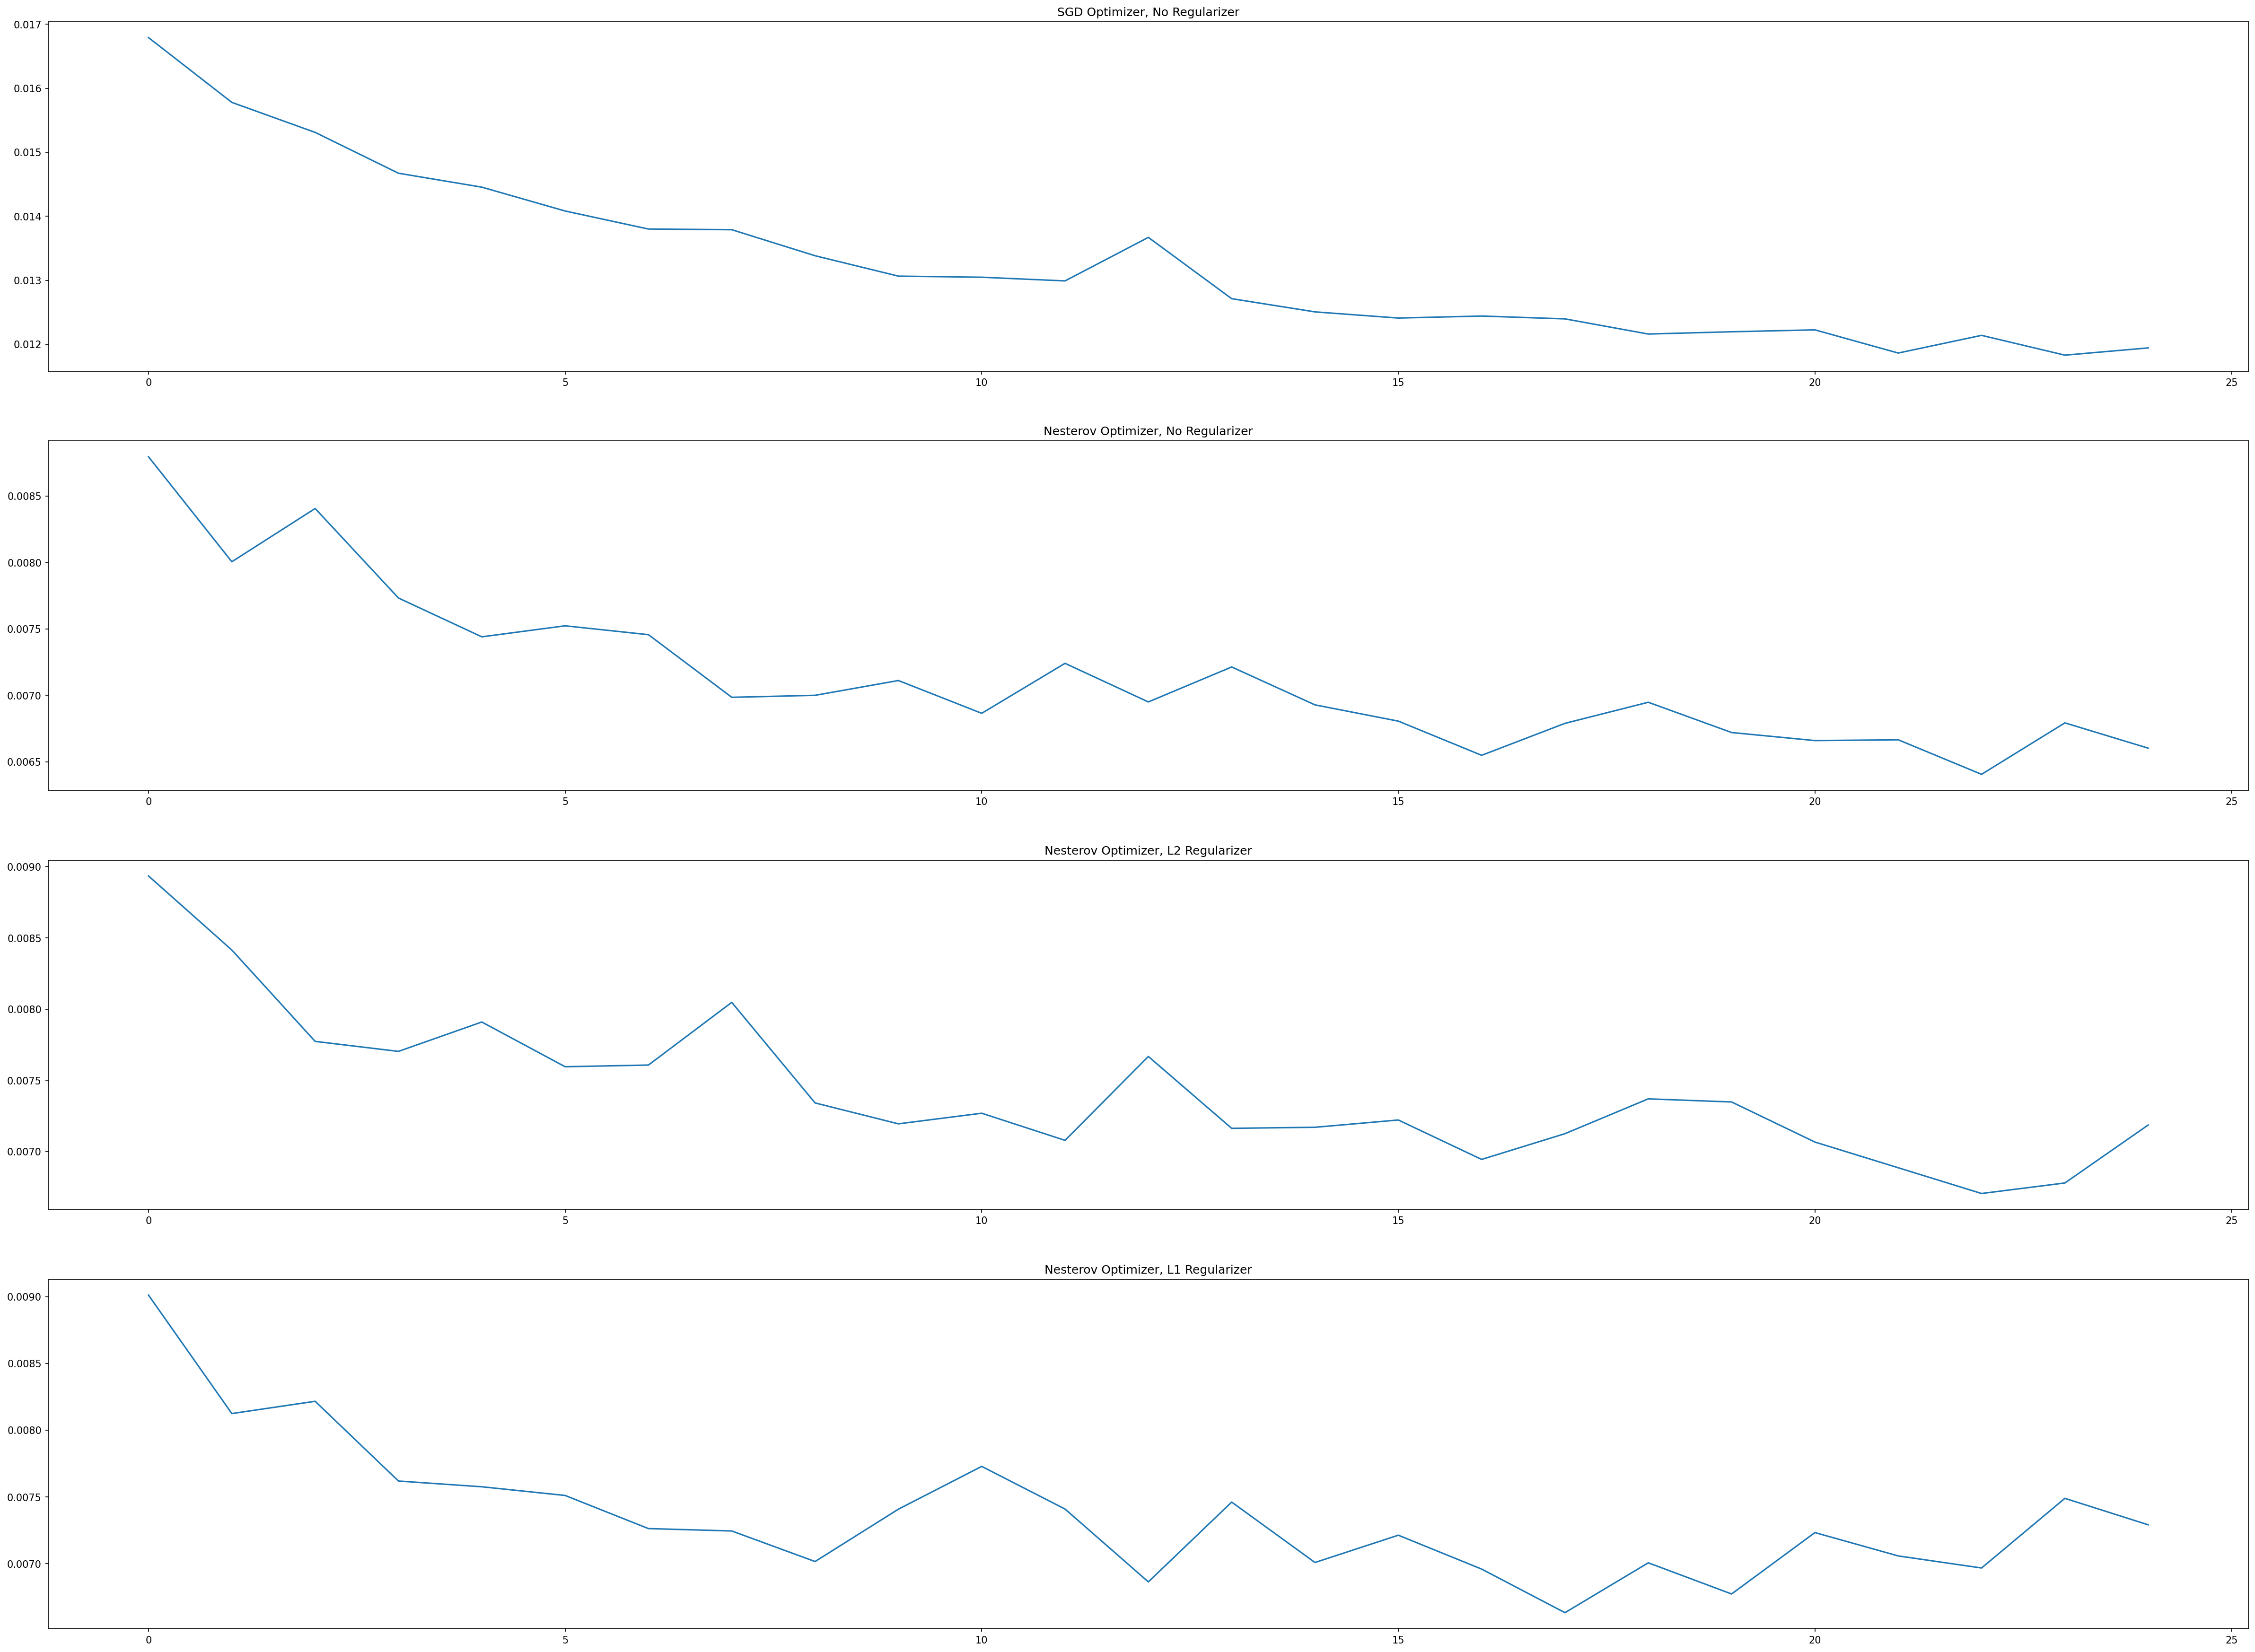

In [38]:
fig, axs = plt.subplots(4, figsize=(40,30), dpi=150, sharex=False, sharey=False)

epoch = 2   #which epoch loss data you want to visualize
num_of_batch = 313 #got the info from the prints

axs[0].plot(valid_loss_hist_1); axs[0].set_title('SGD Optimizer, No Regularizer')
axs[1].plot(valid_loss_hist_2); axs[1].set_title('Nesterov Optimizer, No Regularizer')
axs[2].plot(valid_loss_hist_3); axs[2].set_title('Nesterov Optimizer, L2 Regularizer')
axs[3].plot(valid_loss_hist_4); axs[3].set_title('Nesterov Optimizer, L1 Regularizer')

### Comparing the Losses of 4 Experiments (on the Training Data)

Text(0.5, 1.0, 'Nesterov Optimizer, L1 Regularizer')

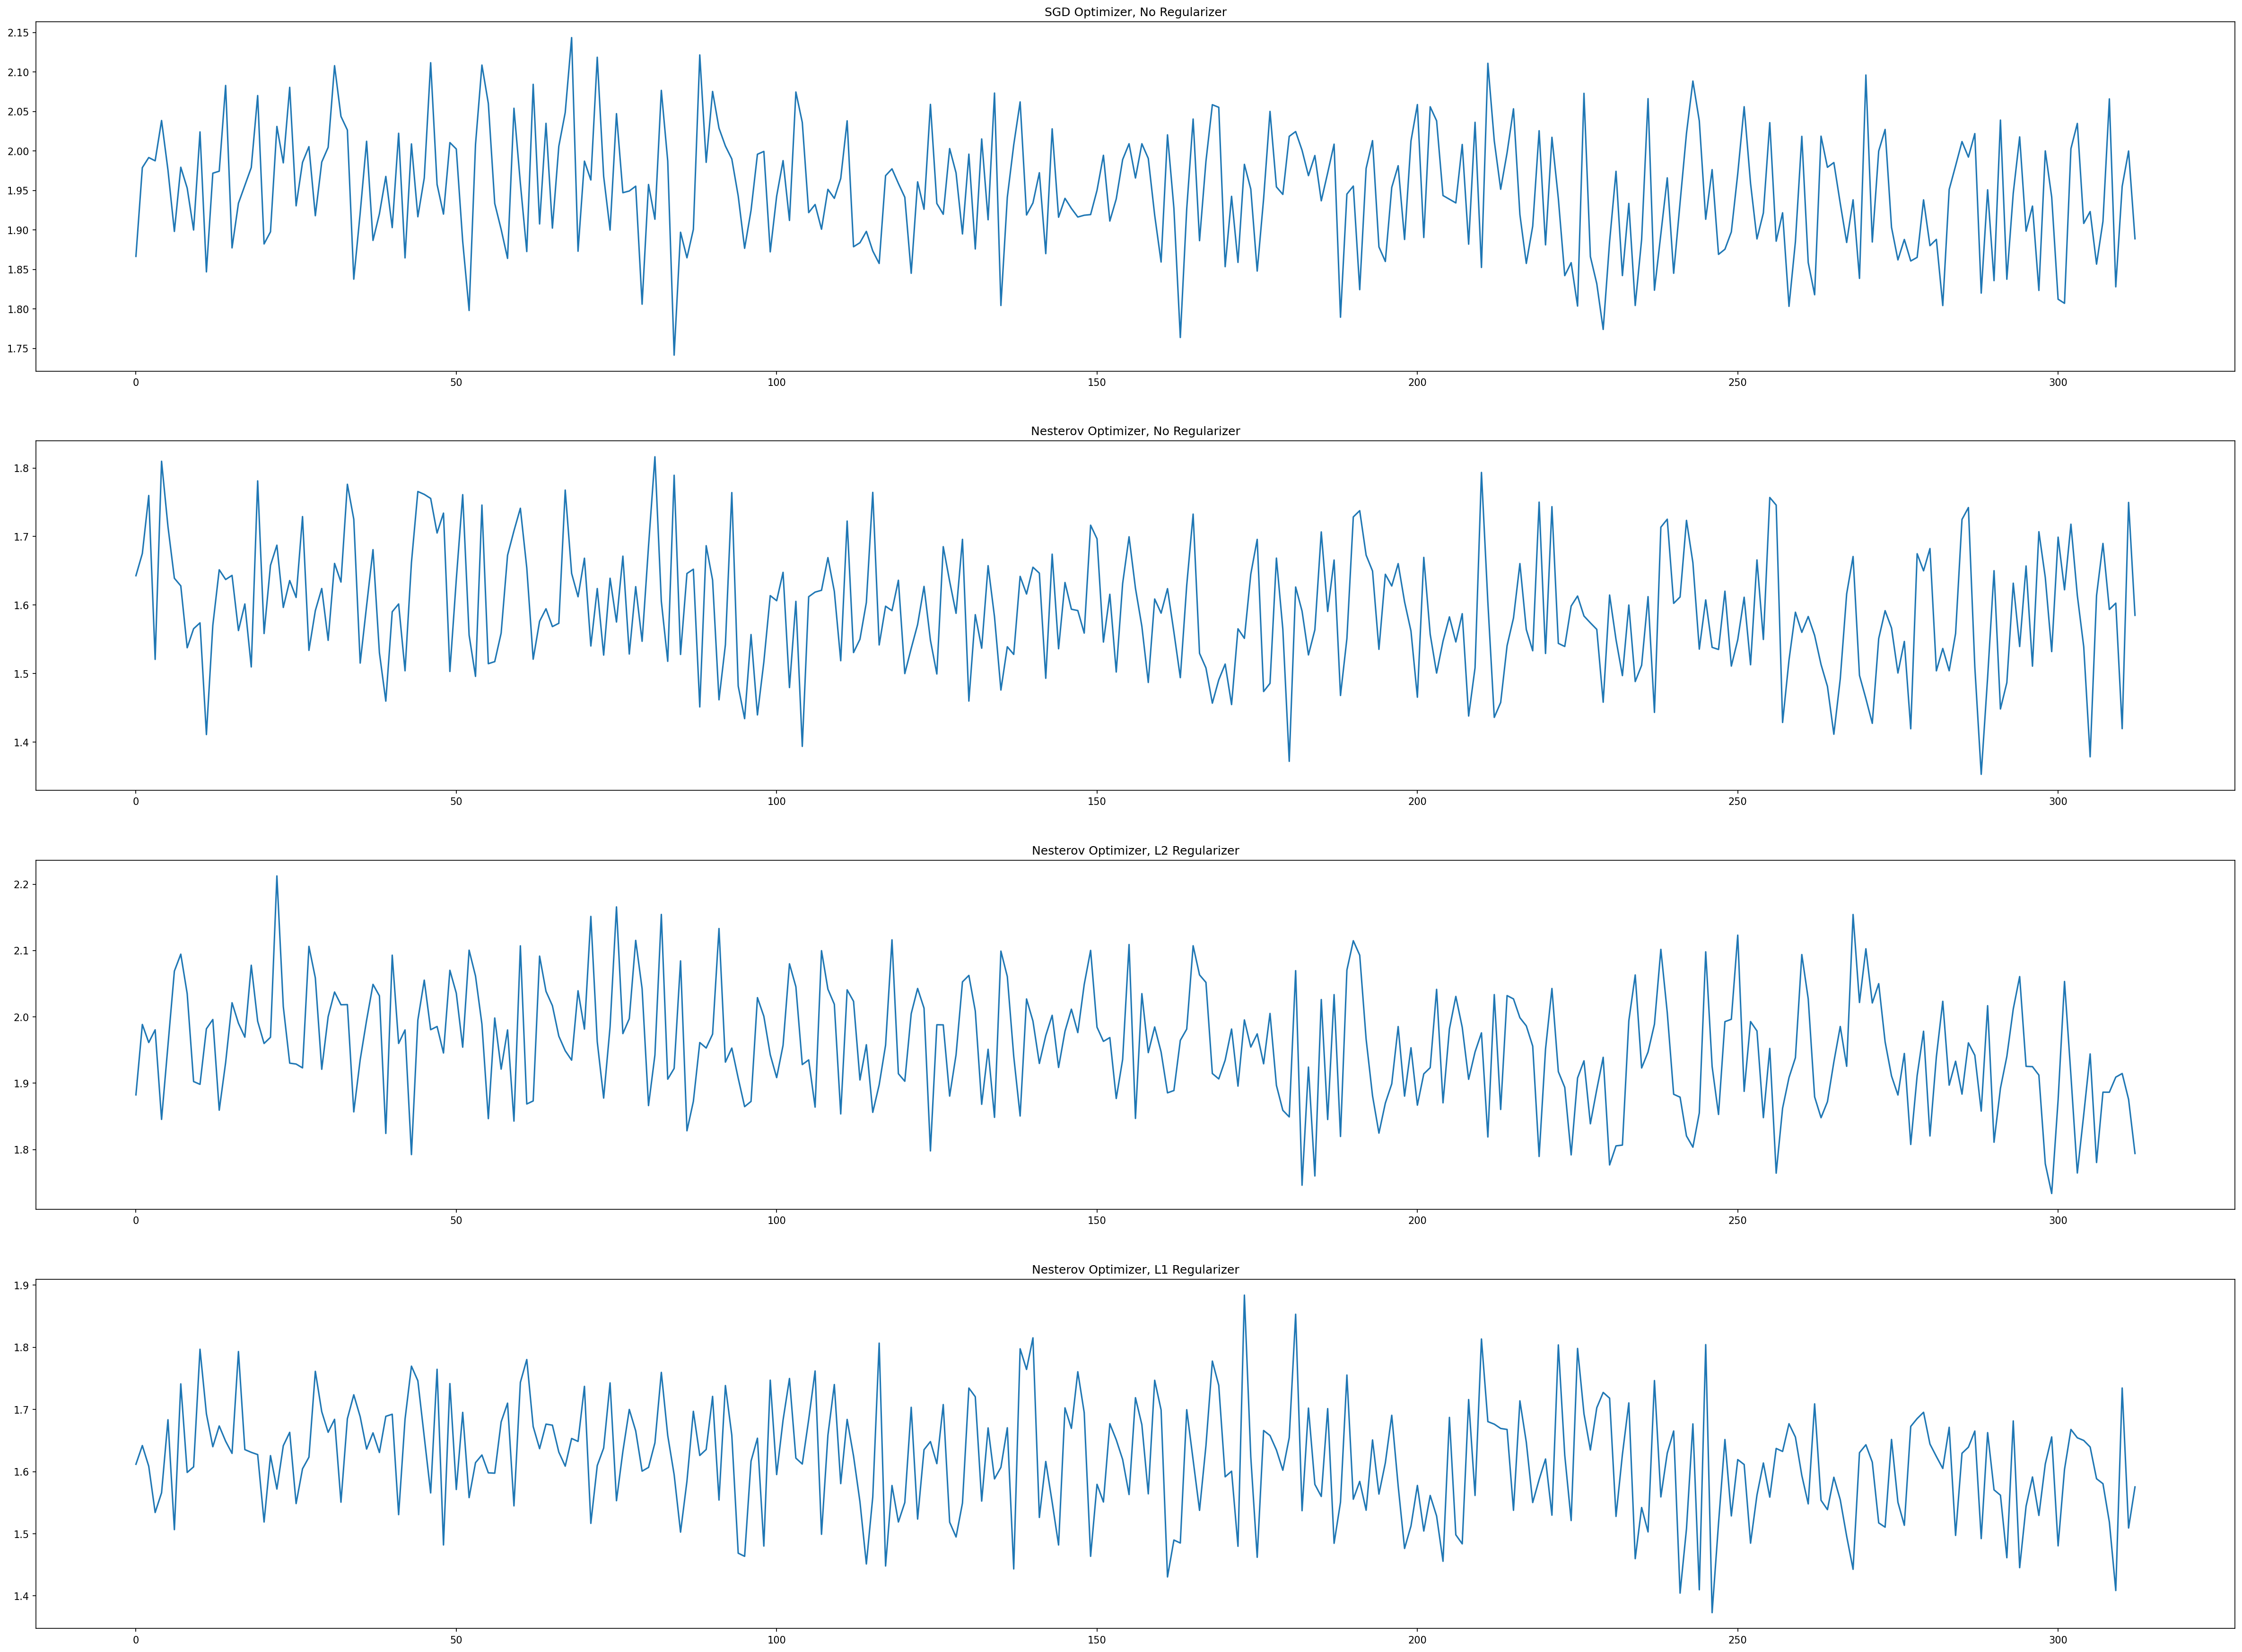

In [39]:
fig, axs = plt.subplots(4, figsize=(40,30), dpi=150, sharex=False, sharey=False)

epoch = 2   #which epoch loss data you want to visualize
num_of_batch = 313 #got the info from the prints

axs[0].plot(training_loss_hist_1[epoch*num_of_batch : (epoch+1)*num_of_batch], "-"); axs[0].set_title('SGD Optimizer, No Regularizer')
axs[1].plot(training_loss_hist_2[epoch*num_of_batch : (epoch+1)*num_of_batch], "-"); axs[1].set_title('Nesterov Optimizer, No Regularizer')
axs[2].plot(training_loss_hist_3[epoch*num_of_batch : (epoch+1)*num_of_batch], "-"); axs[2].set_title('Nesterov Optimizer, L2 Regularizer')
axs[3].plot(training_loss_hist_4[epoch*num_of_batch : (epoch+1)*num_of_batch], "-"); axs[3].set_title('Nesterov Optimizer, L1 Regularizer')

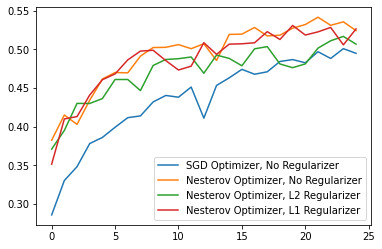

In [50]:
plt.plot(valid_acc_hist_1, label="SGD Optimizer, No Regularizer")
plt.plot(valid_acc_hist_2, label="Nesterov Optimizer, No Regularizer")
plt.plot(valid_acc_hist_3, label="Nesterov Optimizer, L2 Regularizer")
plt.plot(valid_acc_hist_4, label="Nesterov Optimizer, L1 Regularizer")
plt.legend()


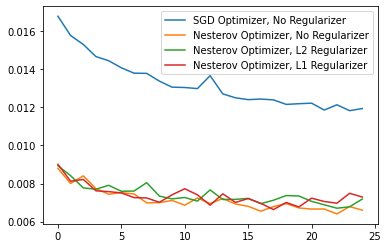

In [51]:
plt.plot(valid_loss_hist_1, label="SGD Optimizer, No Regularizer")
plt.plot(valid_loss_hist_2, label="Nesterov Optimizer, No Regularizer")
plt.plot(valid_loss_hist_3, label="Nesterov Optimizer, L2 Regularizer")
plt.plot(valid_loss_hist_4, label="Nesterov Optimizer, L1 Regularizer")
plt.legend()

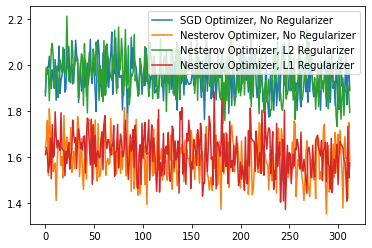

In [54]:
epoch = 2   #which epoch loss data you want to visualize
num_of_batch = 313 #got the info from the prints

plt.plot(training_loss_hist_1[epoch*num_of_batch : (epoch+1)*num_of_batch], label="SGD Optimizer, No Regularizer")
plt.plot(training_loss_hist_2[epoch*num_of_batch : (epoch+1)*num_of_batch], label="Nesterov Optimizer, No Regularizer")
plt.plot(training_loss_hist_3[epoch*num_of_batch : (epoch+1)*num_of_batch], label="Nesterov Optimizer, L2 Regularizer")
plt.plot(training_loss_hist_4[epoch*num_of_batch : (epoch+1)*num_of_batch], label="Nesterov Optimizer, L1 Regularizer")
plt.legend()